In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
# Checking missing values
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1071
agePossession             0
super_built_up_area    1766
built_up_area          2051
carpet_area            1769
study room                0
pooja room                0
store room                0
servant room              0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

## Built up area

C:\Users\Lenovo\AppData\Local\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area', ylabel='super_built_up_area'>

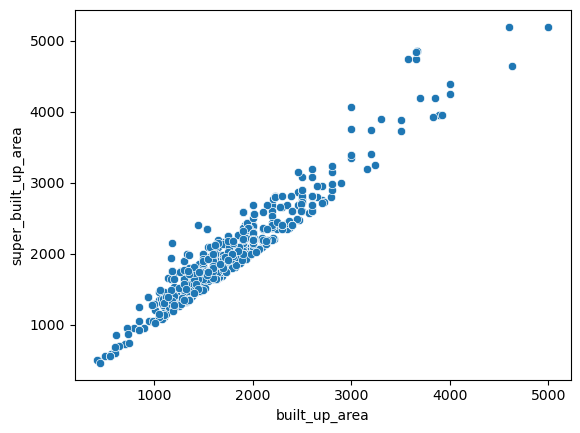

In [5]:
sns.scatterplot(df['built_up_area'],df['super_built_up_area'])

- There is strong linear relationship between built up area and super built up area

C:\Users\Lenovo\AppData\Local\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area', ylabel='carpet_area'>

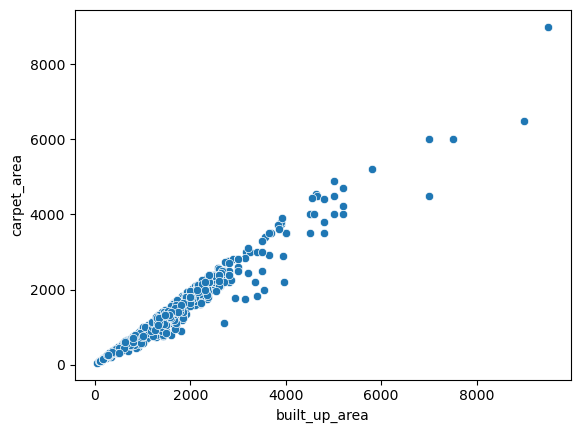

In [6]:
sns.scatterplot(df['built_up_area'],df['carpet_area'])

- We also observed that there have also strong linear realtionship b/w Built up area and Carpet area

In [7]:
df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))].isnull().sum().sum()

0.0

- Here we observed that there are no such flats or aprtments which do have null values in superbuiltup area, builtup area, carpet area
- Atleast one value is present

In [8]:
all_present_df=df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [9]:
all_present_df.shape

(534, 24)

In [10]:
super_to_built_up_ratio=(all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [11]:
carpert_to_built_up_ratio=(all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [12]:
print(super_to_built_up_ratio,carpert_to_built_up_ratio)

1.1048701298701298 0.900140056022409


In [13]:
# both present but built up area is null
sbc_df=df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [14]:
# Filling missing values of built up area with the help of super built up area and carpet area

sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105)+(sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2260\4237780290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105)+(sbc_df['carpet_area']/0.9))/2),inplace=True)


In [15]:
df.update(sbc_df)

In [16]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1071
agePossession             0
super_built_up_area    1766
built_up_area          1623
carpet_area            1769
study room                0
pooja room                0
store room                0
servant room              0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [17]:
# Extracting data where super built up area is present and rest built up and carpet area is null
sb_df=df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [18]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,pooja room,store room,servant room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,indiabulls centrum park,sector 103,2.20,7652.0,2875.0,Super Built up area 2875(267.1 sq.m.),4.0,6.0,3+,4.0,North-East,Relatively New,2875.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,2.0,108.0,718.750000
6,flat,godrej,sector 79,1.35,8970.0,1505.0,Super Built up area 1505(139.82 sq.m.),3.0,3.0,2,7.0,South-West,Relatively New,1505.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,118.0,501.666667
12,flat,ansal housing highland park,sector 103,0.88,6428.0,1369.0,Super Built up area 1361(126.44 sq.m.),2.0,2.0,3,3.0,NaN,New Property,1361.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,52.0,684.500000
21,flat,tulip violet,sector 69,1.32,8413.0,1569.0,Super Built up area 1568(145.67 sq.m.),3.0,3.0,1,12.0,South-East,Relatively New,1568.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,86.0,523.000000
22,flat,godrej,sector 79,1.28,8505.0,1505.0,Super Built up area 1505(139.82 sq.m.),3.0,3.0,3,7.0,North-East,Relatively New,1505.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,158.0,501.666667


In [19]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2260\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [20]:
sb_df['built_up_area'].max()

9050.0

In [21]:
df.update(sb_df)

In [22]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1071
agePossession             0
super_built_up_area    1766
built_up_area           720
carpet_area            1769
study room                0
pooja room                0
store room                0
servant room              0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [26]:
# We extract those data where super built up area is null but carpet area is present
c_df=df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [27]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2260\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [28]:
c_df['built_up_area'].max()

12222.0

In [29]:
df.update(c_df)

In [30]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1071
agePossession             0
super_built_up_area    1766
built_up_area             0
carpet_area            1769
study room                0
pooja room                0
store room                0
servant room              0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<AxesSubplot:xlabel='built_up_area', ylabel='price'>

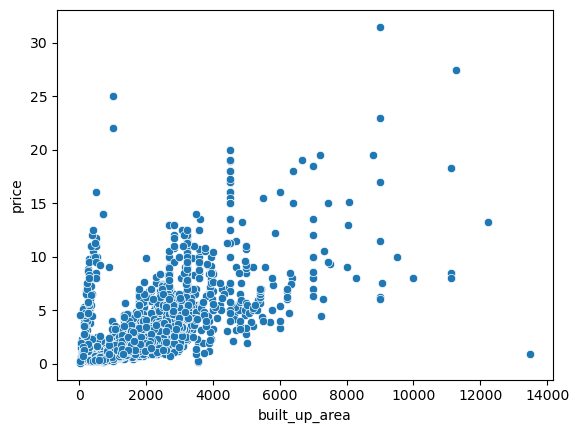

In [31]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [32]:
anamoly_df=df[(df['built_up_area']< 2000) & (df['price']>2.5)][['price','area','built_up_area']]

In [33]:
anamoly_df.sample(5)

,price,area,built_up_area
2991,8.25,2160.0,300.0
3080,2.55,1650.0,1469.0
2514,6.30,1800.0,1800.0
1881,4.00,8829.0,981.0
2597,2.99,1449.0,1449.0


In [34]:
anamoly_df['built_up_area']=anamoly_df['area']

In [35]:
df.update(anamoly_df)

C:\Users\Lenovo\AppData\Local\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area', ylabel='price'>

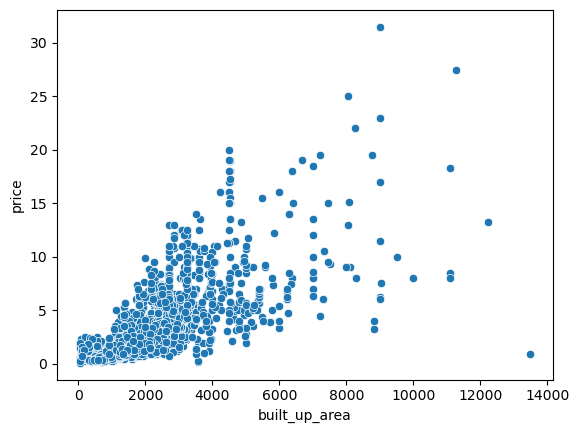

In [36]:
sns.scatterplot(df['built_up_area'],df['price'])

In [38]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [39]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing', 'agePossession',
       'built_up_area', 'study room', 'pooja room', 'store room',
       'servant room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [40]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1071
agePossession         0
built_up_area         0
study room            0
pooja room            0
store room            0
servant room          0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## floor num

In [41]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,pooja room,store room,servant room,others,furnishing_type,luxury_score
209,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
363,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
496,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
710,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,2.0,130.0
740,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
874,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1001,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1038,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1124,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0


In [45]:
floor_median=df[df['property_type']=='house']['floorNum'].median()

In [46]:
df['floorNum'].fillna(floor_median,inplace=True)

In [47]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1071
agePossession         0
built_up_area         0
study room            0
pooja room            0
store room            0
servant room          0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## Facing

<AxesSubplot:ylabel='facing'>

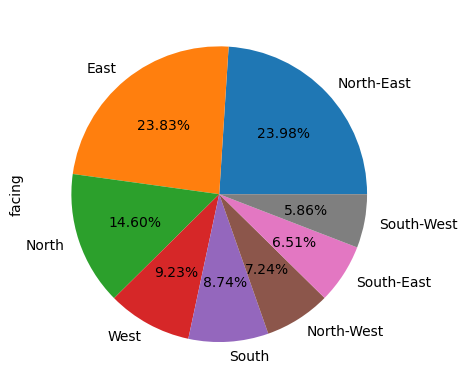

In [49]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [50]:
df['facing'].isnull().sum()/df.shape[0]

0.29095354523227385

- This is quite impossible to predict almost 29 % missing data
- So we are going to drop 'facing' column

In [51]:
df.drop(columns=['facing'],inplace=True)

In [52]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
pooja room         0
store room         0
servant room       0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [53]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,pooja room,store room,servant room,others,furnishing_type,luxury_score
1247,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df=df[~(df['society'].isnull())]

In [56]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
pooja room         0
store room         0
servant room       0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

## agePossession

In [58]:
df['agePossession'].value_counts()

Relatively New        1635
New Property           590
Moderately Old         557
Undefined              318
Old Property           300
Under Construction     280
Name: agePossession, dtype: int64

In [59]:
df[df['agePossession']=='Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,pooja room,store room,servant room,others,furnishing_type,luxury_score
3,flat,raheja vedaanta,sector 108,1.00,4854.0,2.0,2.0,2,0.0,Undefined,2060.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,house,independent,sector 11,1.80,8079.0,8.0,5.0,2,1.0,Undefined,2476.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,flat,trisara our homes,sohna road,0.40,4479.0,2.0,2.0,2,1.0,Undefined,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,flat,aipl zen residences,sector 70a,1.40,11094.0,2.0,2.0,2,16.0,Undefined,1262.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,flat,sare crescent parc,sector 92,0.82,5384.0,3.0,3.0,3+,12.0,Undefined,1523.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,flat,aipl peaceful homes,sector 70a,2.75,12791.0,3.0,3.0,3+,14.0,Undefined,2150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3644,flat,mapsko mount ville,sector 79,1.65,9091.0,3.0,3.0,0,12.0,Undefined,1815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3646,house,independent,sector 4,0.70,6648.0,3.0,3.0,0,1.0,Undefined,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3649,house,independent,sector 105,1.30,11556.0,3.0,3.0,1,1.0,Undefined,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
def mode_based_imputation(row):
    if row['agePossession']=='Undefined':
        mode_value=df[(df['sector']==row['sector']) & (df['property_type']==row['property_type'])]['agePossession'].mode()
        # if mode value is empty (no mode value), return Nan, otherwise return mode value
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [63]:
df['agePossession']=df.apply(mode_based_imputation,axis=1)

In [65]:
df['agePossession'].value_counts()

Relatively New        1762
New Property           632
Moderately Old         598
Old Property           334
Under Construction     297
Undefined               57
Name: agePossession, dtype: int64

In [66]:
def mode_based_imputation2(row):
    if row['agePossession']=='Undefined':
        mode_value=df[(df['sector']==row['sector'])]['agePossession'].mode()
        # if mode value is empty (no mode value), return Nan, otherwise return mode value
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [67]:
df['agePossession']=df.apply(mode_based_imputation2,axis=1)

In [68]:
df['agePossession'].value_counts()

Relatively New        1772
New Property           633
Moderately Old         605
Old Property           340
Under Construction     297
Undefined               33
Name: agePossession, dtype: int64

In [69]:
def mode_based_imputation3(row):
    if row['agePossession']=='Undefined':
        mode_value=df[(df['property_type']==row['property_type'])]['agePossession'].mode()
        # if mode value is empty (no mode value), return Nan, otherwise return mode value
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [70]:
df['agePossession']=df.apply(mode_based_imputation3,axis=1)

In [71]:
df['agePossession'].value_counts()

Relatively New        1774
Moderately Old         636
New Property           633
Old Property           340
Under Construction     297
Name: agePossession, dtype: int64

In [72]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
pooja room         0
store room         0
servant room       0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [74]:
df.to_csv('gurgaon_properties_missing_value_imputations.csv',index=False)